# Salmon price volatility analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

from model import ARMA_GARCH

import sys
sys.path.append("..")
from utils import *

## Data Loading and Model Creation

In [10]:
data_URL ='https://www.ssb.no/statbank/sq/10086365'

salmon_data = import_salmon_data(data_URL, rename_cols=True)

com_data = yf.download(['ZW=F', 'ZS=F', 'HE=F'],
    start=salmon_data.index[0], 
    end=salmon_data.index[-1], 
    interval='1wk', 
    progress=False
)['Adj Close']


models = {
    'Fresh salmon': ARMA_GARCH(salmon_data['Price']),
    'Pork': ARMA_GARCH(com_data['HE=F']),
    'Wheat': ARMA_GARCH(com_data['ZW=F']),
    'Soybean': ARMA_GARCH(com_data['ZS=F']),
}


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6968.579, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7055.803, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7024.815, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7003.056, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7054.161, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6970.772, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6966.794, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6984.118, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6967.503, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6967.493, Time=1.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6966.505, Time=0.33 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6968.403, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6969.353, Time=1.98 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6964.869, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]          

## Conditional volatility plot

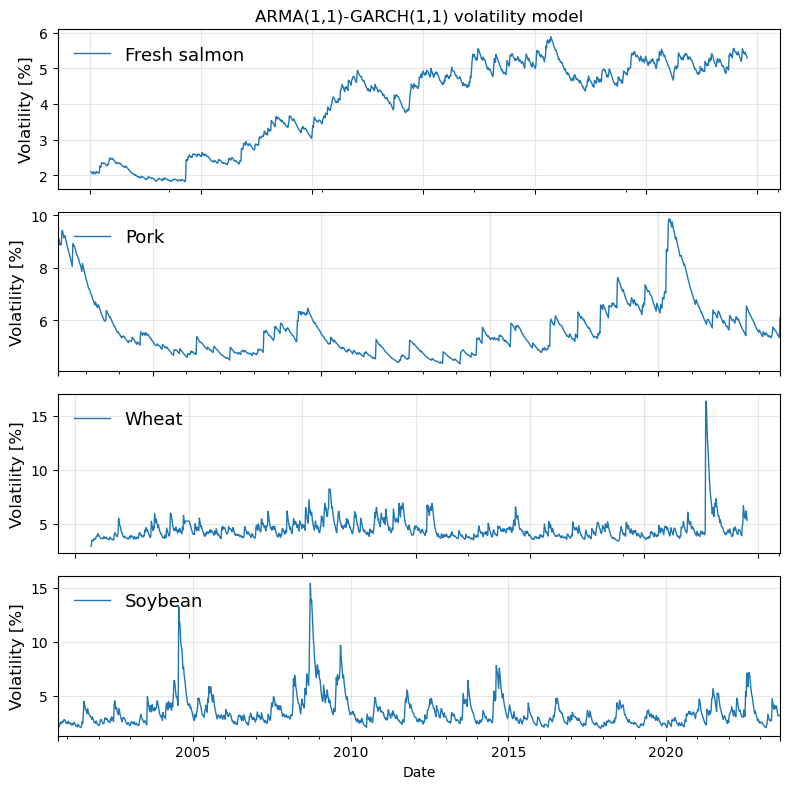

In [11]:

markets = ['fresh salmon market', 'Pork futures', 'wheat futures', 'soybean futures']

fig, axs = plt.subplots(len(models.keys()), figsize=(8, 8))

for i, (model, key) in enumerate(zip(models.values(), models.keys())):
    model.conditional_volatility.plot(
        ax=axs[i], 
        linewidth=1, 
        sharex = axs[0],
        label=key
    )

    axs[i].set_ylabel('Volatility [%]', fontsize=12)
    axs[i].grid(alpha=0.3)
    axs[i].legend(fontsize=13, frameon=False, loc='upper left')

fig.subplots_adjust(wspace=0)
axs[0].set_title('ARMA(1,1)-GARCH(1,1) volatility model', fontsize=12)
axs[0].set_xlabel('Date', fontsize=12)
fig.tight_layout()

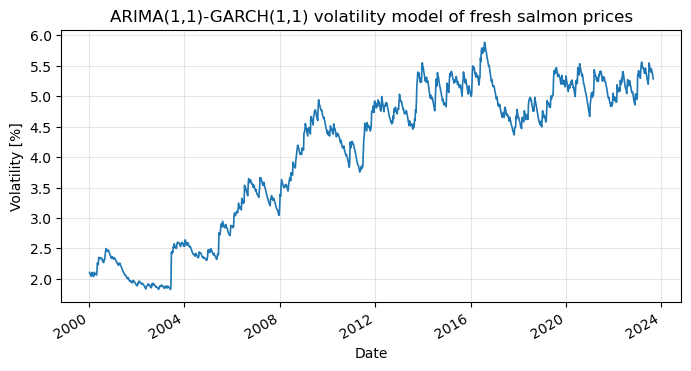

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

models['Fresh salmon'].conditional_volatility.plot(
        linewidth=1.2, 
)

ax.grid(alpha=0.3)
ax.set_title('ARIMA(1,1)-GARCH(1,1) volatility model of fresh salmon prices')
ax.set_ylabel('Volatility [%]')
ax.set_xlabel('Date')

fig.savefig('Vol_model.png', dpi=200)

## Volatility spikes distribution

Soybean:
mu: 0.0859, std: 3.7011
Wheat:
mu: 0.0682, std: 4.5464


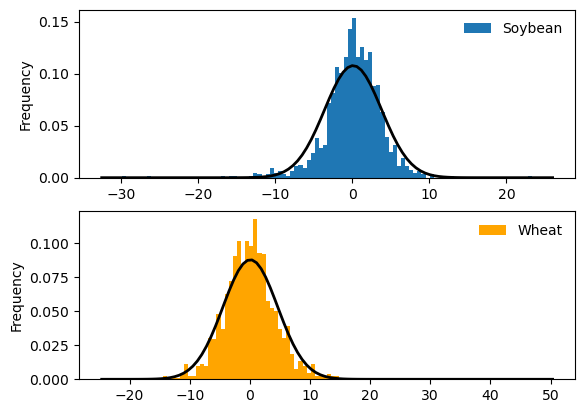

In [13]:
fig, axs = plt.subplots(2)

models['Soybean'].log_yield.plot(kind='hist', bins=100, ax=axs[0], density=True, label='Soybean')
mu, std = norm.fit(models['Soybean'].log_yield)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].legend(frameon=False)

print('Soybean:')
print(f'mu: {mu:.4f}, std: {std:.4f}')

models['Wheat'].log_yield.plot(kind='hist', bins=100, ax=axs[1], density=True, label='Wheat', color='orange')
mu, std = norm.fit(models['Wheat'].log_yield)
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1].plot(x, p, 'k', linewidth=2)
axs[1].legend(frameon=False)

print('Wheat:')
print(f'mu: {mu:.4f}, std: {std:.4f}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10464.651, Time=1.76 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10753.775, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10688.397, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10578.073, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10751.858, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10471.993, Time=0.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10465.083, Time=1.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10437.820, Time=2.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10447.540, Time=1.46 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=10442.007, Time=2.98 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=10443.658, Time=3.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=10443.505, Time=2.81 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=10441.218, Time=1.88 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=10435.269, Time=3.50 sec
 ARIMA(5,0,3)(0,0,0

<Axes: xlabel='uke'>

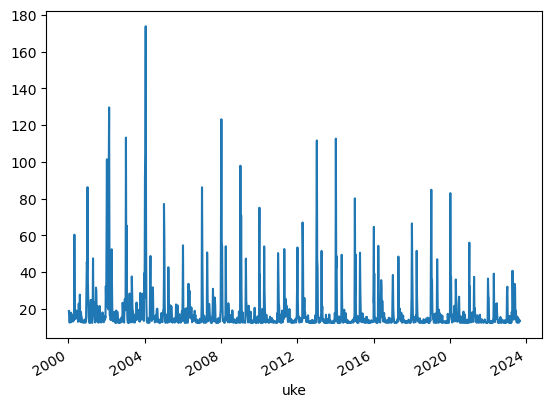

In [14]:
volume_model = ARMA_GARCH(salmon_data['Volume'])

volume_model.conditional_volatility.plot()